In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import zipfile

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [4]:
#print('Train: ',df_train.shape)
#print('Test: ', df_test.shape)

In [5]:
file_read = pd.read_csv('/content/drive/MyDrive/Orcawise_project_NLP/final_merged_data2.csv')

#file_read = pd.read_csv('data/final_merged_data.csv')

In [6]:
df_1 = file_read.iloc[:4886,:]
df_2 = file_read.iloc[4887:,:]

In [7]:
df_1.to_csv("train.csv", index=False)
df_2.to_csv("test.csv", index=False)

In [8]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [9]:
print('Train: ',df_train.shape)
print('Test: ', df_test.shape)

Train:  (4886, 11)
Test:  (719, 11)


##**1.2 Inspecting the data**

 #### 1.2.1 The train data

In [10]:
df_train.head(5)

,sentences,sentences_labels,Subject,Object,relations,labels,filename,relations_id,cleaned_text,Combinations,Combination_spin_text
0,"[E1]Rocky Subramanian[/E1], SVP & MD of [E2]SA...","[PERSON]Rocky Subramanian[/PERSON], SVP & MD o...",Rocky Subramanian,SAP,managerOf,"['PERSON', 'ORG']",article_197_human_tech.txt,0,"[E1]Rocky Subramanian[/E1], SVP & MD of [E2]SA...","[E1]Rocky Subramanian[/E1], SVP & MD of [E2]SA...","[E1]Rocky Subramanian[/E1], SVP & MD of [E2]SA..."
1,[E2]Leo[/E2] is employed by [E1]Zebra Technolo...,[PERSON]Leo[/PERSON] is empl[ORG]oyed by Zebra...,Zebra Technologies,Leo,employedBy,"['ORG', 'PERSON']",admin.txt,2,[E2]Leo[/E2] is employed by [E1]Zebra Technolo...,[E2]Leo[/E2] is employed by [E1]Zebra Technolo...,[E2]Leo[/E2] is employed by [E1]Zebra Technolo...
2,"[E1]The United Nations[/E1], based in [E2]New ...","[ORG]The United Nations[/ORG], based in [GPE]N...",The United Nations,New York City,locatedAt,"['ORG', 'GPE']",located_at.txt,1,"[E1]The United Nations[/E1], based in [E2]New ...","[E1]The United Nations[/E1], based in [E2]New ...","[E1]The United Nations[/E1], based in [E2]New ..."
3,The [E1]ETP[/E1] is expected to be made offici...,The [ORG]ETP[/ORG] is expected to be made offi...,ETP,UK,noRelation,"['ORG', 'GPE']",article_67_key_areas.txt,3,The [E1]ETP[/E1] is expected to be made offici...,The [E1]ETP[/E1] is expected to be made offici...,The [E1]ETP[/E1] is expected to be made offici...
4,"[E1]Rocky Subramanian[/E1], SVP & MD of [E2]SA...","[PERSON]Rocky Subramanian[/PERSON], SVP & MD o...",Rocky Subramanian,SAP,managerOf,"['PERSON', 'ORG']",article_197_human_tech.txt,0,"[E1]Rocky Subramanian[/E1], SVP & MD of [E2]SA...","[E1]Rocky Subramanian[/E1], SVP & MD of [E2]SA...","[E1]Rocky Subramanian[/E1] , SVP & MD of [E2]S..."


In [11]:
df_train['Combination_spin_text'][0]

'[E1]Rocky Subramanian[/E1], SVP & MD of [E2]SAP[/E2], talks us through the benefits of human and tech augmentation in the manufacturing industry   .'

 #### 1.2.2 The test data

In [12]:
df_test.head(5)

,sentences,sentences_labels,Subject,Object,relations,labels,filename,relations_id,cleaned_text,Combinations,Combination_spin_text
0,[E1]San Francisco[/E1] is where [E2]Ryan[/E2] ...,[GPE]San Francisco[/GPE] is where [PERSON]Ryan...,San Francisco,Ryan,noRelation,"['GPE', 'PERSON']",all.txt,3,[E1]San Francisco[/E1] is where [E2]Ryan[/E2] ...,[E1]San Francisco[/E1] is where [E2]Ryan[/E2] ...,[E1]San Francisco[/E1] is where [E2]Ryan[/E2] ...
1,Even as [E1]Ruth Porat[/E1] praised the announ...,Even as [PERSON]Ruth Porat[/PERSON] praised th...,Ruth Porat,Google's,managerOf,"['PERSON', 'ORG']",article_29_google_will_spend.txt,0,Even as [E1]Ruth Porat[/E1] praised the announ...,Even as [E1]Ruth Porat[/E1] praised the announ...,Even as [E1]Ruth Porat[/E1] praised the announ...
2,Natalie Turner and [E1]Oliver Cooper[/E1] work...,Natalie Turner and [PERSON]Oliver Cooper[/PERS...,Oliver Cooper,"Digital Dynamics,",employedBy,"['PERSON', 'ORG']",all.txt,2,Natalie Turner and [E1]Oliver Cooper[/E1] work...,"Natalie Turner and [E2] Digital Dynamics,[/E2]...","Natalie Turner and [E2] Digital Dynamics,[/E2]..."
3,"Plus, the move pours funds into diverse metrop...","Plus, the move pours funds into diverse metrop...",Google,Silicon Valley,locatedAt,"['ORG', 'GPE']",article_29_google_will_spend.txt,1,"Plus, the move pours funds into diverse metrop...","Plus, the move pours funds into diverse metrop...","asset , the relocation teem investment_company..."
4,[E1]San Francisco[/E1] is where [E2]Ryan[/E2] ...,[GPE]San Francisco[/GPE] is where [PERSON]Ryan...,San Francisco,Ryan,noRelation,"['GPE', 'PERSON']",all.txt,3,[E1]San Francisco[/E1] is where [E2]Ryan[/E2] ...,[E1]San Francisco[/E1] is where [E2]Ryan[/E2] ...,[E1]San Francisco[/E1] is where [E2]Ryan[/E2] ...


In [13]:
df_test['Combination_spin_text'][0]

'[E1]San Francisco[/E1] is where [E2]Ryan[/E2] works in the tech industry.'

### **1.3 Splitting the Data**

In [14]:
#Creating the train data
X_train = df_train['Combination_spin_text']
y_train=df_train['relations_id']

#Creating the test data
X_test = df_test['Combination_spin_text']
y_test=df_test['relations_id']

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the training file
df_train = pd.read_csv('train.csv')

# Split the training data into train and validation sets
train_df, val_df = train_test_split(df_train, test_size=0.1, random_state=42)


# Save the validation data to a CSV file
val_df.to_csv("val.csv", index=False)
train_df.to_csv("train.csv", index=False)

 #### 1.4 Inspecting the dataset

In [16]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.7 MB/s eta 0:00:00


In [17]:
from datasets import load_dataset

# Load the dataset
annotated_dataset = load_dataset("csv", data_files={
    "train": "/content/train.csv",
    "validation": "/content/val.csv",
    "test": "/content/test.csv",
})

# Access the train, validation, and test splits
train_dataset = annotated_dataset["train"]
val_dataset = annotated_dataset["validation"]
test_dataset = annotated_dataset["test"]




Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [18]:
train_dataset

Dataset({
    features: ['sentences', 'sentences_labels', 'Subject', 'Object', 'relations', 'labels', 'filename', 'relations_id', 'cleaned_text', 'Combinations', 'Combination_spin_text'],
    num_rows: 4397
})

In [19]:
val_dataset

Dataset({
    features: ['sentences', 'sentences_labels', 'Subject', 'Object', 'relations', 'labels', 'filename', 'relations_id', 'cleaned_text', 'Combinations', 'Combination_spin_text'],
    num_rows: 489
})

In [20]:
test_dataset

Dataset({
    features: ['sentences', 'sentences_labels', 'Subject', 'Object', 'relations', 'labels', 'filename', 'relations_id', 'cleaned_text', 'Combinations', 'Combination_spin_text'],
    num_rows: 719
})

 ### **2. Visualization**

### **3.Tokenization**



*   This is the process of taking the input and breaking it down to token to extract patterns. (puts the words into number the model can understand)
*   Steps:
To achieve this we will first take our input and convert it to a list. Given the tokenizer a list of inputs.




In [21]:
!pip install transformers

In [22]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [23]:
tokenizer

BertTokenizer(name_or_path='bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [24]:
print("Tokenizer input max length:", tokenizer.model_max_length)
print("Tokenizer vocabulary size:", tokenizer.vocab_size)

Tokenizer input max length: 512
Tokenizer vocabulary size: 30522


In [25]:
special_tokens_dict = {'additional_special_tokens': ['[E1]', '[/E1]', '[E2]', '[/E2]']}
tokenizer.add_special_tokens(special_tokens_dict)

4

 ### 3.2 Tokenizing the dataset

In [26]:
%matplotlib inline

In [27]:
count = 1  # Initialize count as a global variable
def tokenize_text(batch):
    global count  # Use global to indicate that count is a global variable
    tokens = tokenizer(
        batch["sentences"],
        truncation=True,
        padding=True
    )

    print("Number of sentences in batch no. {} is {}".format(
        count, len(tokens["input_ids"])))

    # Find the maximum sequence length in this batch
    max_len = max(
        len(example_ids) for example_ids in tokens["input_ids"]
    )

    print("max length of batch no {} is {}".format(count, max_len))

    # Apply padding and truncation based on the maximum length
    tokens["input_ids"] = [ids + [tokenizer.pad_token_id] * (max_len - len(ids)) for ids in tokens["input_ids"]]
    tokens["attention_mask"] = [[1] * len(ids) + [0] * (max_len - len(ids)) for ids in tokens["input_ids"]]

    print("length of each sentence in batch no {} is {}".format(
        count, len(tokens["input_ids"][0])))
    print()

    count += 1  # Increment count for the next batch

    return tokens

# Find the maximum sentence length across all batches
data_tokenized = annotated_dataset.map(tokenize_text, batched=True)
max_sentence_length = max(len(ids) for ids in data_tokenized["train"]["input_ids"]) #len(ids) to get the length of each input_ids list within each batch.
print(f"Maximum sentence length: {max_sentence_length}")


Map:   0%|          | 0/4397 [00:00<?, ? examples/s]

Number of sentences in batch no. 1 is 1000
max length of batch no 1 is 213
length of each sentence in batch no 1 is 213

Number of sentences in batch no. 2 is 1000
max length of batch no 2 is 213
length of each sentence in batch no 2 is 213

Number of sentences in batch no. 3 is 1000
max length of batch no 3 is 213
length of each sentence in batch no 3 is 213

Number of sentences in batch no. 4 is 1000
max length of batch no 4 is 213
length of each sentence in batch no 4 is 213

Number of sentences in batch no. 5 is 397
max length of batch no 5 is 213
length of each sentence in batch no 5 is 213



Map:   0%|          | 0/489 [00:00<?, ? examples/s]

Number of sentences in batch no. 6 is 489
max length of batch no 6 is 213
length of each sentence in batch no 6 is 213



Map:   0%|          | 0/719 [00:00<?, ? examples/s]

Number of sentences in batch no. 7 is 719
max length of batch no 7 is 152
length of each sentence in batch no 7 is 152

Maximum sentence length: 213


In [28]:
data_tokenized.set_format("torch", columns=["input_ids", "attention_mask", "relations_id"])

In [29]:
print(data_tokenized)

DatasetDict({
    train: Dataset({
        features: ['sentences', 'sentences_labels', 'Subject', 'Object', 'relations', 'labels', 'filename', 'relations_id', 'cleaned_text', 'Combinations', 'Combination_spin_text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 4397
    })
    validation: Dataset({
        features: ['sentences', 'sentences_labels', 'Subject', 'Object', 'relations', 'labels', 'filename', 'relations_id', 'cleaned_text', 'Combinations', 'Combination_spin_text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 489
    })
    test: Dataset({
        features: ['sentences', 'sentences_labels', 'Subject', 'Object', 'relations', 'labels', 'filename', 'relations_id', 'cleaned_text', 'Combinations', 'Combination_spin_text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 719
    })
})


In [30]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

### Set Up DataLoaders:

#### Create DataLoaders to efficiently load and process your dataset during training. DataLoaders allow you to handle batching, shuffling, and other data-related operations. You can use PyTorch's DataLoader class to accomplish this.

In [31]:
from torch.utils.data import DataLoader
from torch.utils.data import Dataset


class annotated_dataset(Dataset):
  def __init__(self, dataset_dict, partition_key="train"):
    self.partition = dataset_dict[partition_key]

  def __getitem__(self, index):
    return self.partition[index]

  def __len__(self):
    return self.partition.num_rows

In [32]:
train_dataset = annotated_dataset(data_tokenized, partition_key="train")
val_dataset = annotated_dataset(data_tokenized, partition_key="validation")
test_dataset = annotated_dataset(data_tokenized, partition_key="test")

train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=16,
    shuffle=True,
    num_workers=4
)

val_loader = DataLoader(
    dataset=val_dataset,
    batch_size=16,
    num_workers=4
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=16,
    num_workers=4
)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Using DataLoaders to handle:
*  Batching
*  Shuffling




### Initializing the BERTbase

In [33]:
from transformers import BertForSequenceClassification,AdamW

model_name = "bert-base-uncased"
#model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=4)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=4) #initializing with pre-trained weights from the bert-base-uncased model.
model.resize_token_embeddings(len(tokenizer))
model.to(device)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30526, 768)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_af

### Freezing all the layers

###### To achieve this by setting the requires_grad attribute of the model's parameters all to false

In [34]:
# Freeze all the parameters
for param in model.parameters():
    param.requires_grad = False

#### Unfreezing the last two layers.

 ###### To achieve this we start by checking the last two layers of the model.

In [35]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30526, 768)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_af

The last two layers of the DistilBERT model is the:
pre-classsifierclassifier
To unfreeze the parameters of the last two layers you use the requires_grad attribute and set the paramters to true.

In [36]:
# Unfreeze the last two layers for fine-tuning

for param in model.bert.encoder.layer[-2:].parameters():
    param.requires_grad = True

In [37]:
## Checking which of the layers are freeze and unfreeze.
num_layers = len(model.bert.encoder.layer)
print ("Number of layers :", num_layers)

# Freeze all layers initially
for layer in model.bert.encoder.layer:
    for param in layer.parameters():
        param.requires_grad = False

# Unfreeze the last two layers
for layer in model.bert.encoder.layer[-2:]:
    for param in layer.parameters():
        param.requires_grad = True

# Verify which layers are unfrozen
for i, (name, param) in enumerate(model.bert.named_parameters()):
    if "encoder.layer" in name:
        print(f"Layer {i}: {name} - {'Unfrozen' if param.requires_grad else 'Frozen'}")


Number of layers : 12
Layer 5: encoder.layer.0.attention.self.query.weight - Frozen
Layer 6: encoder.layer.0.attention.self.query.bias - Frozen
Layer 7: encoder.layer.0.attention.self.key.weight - Frozen
Layer 8: encoder.layer.0.attention.self.key.bias - Frozen
Layer 9: encoder.layer.0.attention.self.value.weight - Frozen
Layer 10: encoder.layer.0.attention.self.value.bias - Frozen
Layer 11: encoder.layer.0.attention.output.dense.weight - Frozen
Layer 12: encoder.layer.0.attention.output.dense.bias - Frozen
Layer 13: encoder.layer.0.attention.output.LayerNorm.weight - Frozen
Layer 14: encoder.layer.0.attention.output.LayerNorm.bias - Frozen
Layer 15: encoder.layer.0.intermediate.dense.weight - Frozen
Layer 16: encoder.layer.0.intermediate.dense.bias - Frozen
Layer 17: encoder.layer.0.output.dense.weight - Frozen
Layer 18: encoder.layer.0.output.dense.bias - Frozen
Layer 19: encoder.layer.0.output.LayerNorm.weight - Frozen
Layer 20: encoder.layer.0.output.LayerNorm.bias - Frozen
Layer 2

In [38]:
# Print the names of the last two layers
last_two_layers = model.bert.encoder.layer[-2:]
for layer in last_two_layers:
    print(layer)


BertLayer(
  (attention): BertAttention(
    (self): BertSelfAttention(
      (query): Linear(in_features=768, out_features=768, bias=True)
      (key): Linear(in_features=768, out_features=768, bias=True)
      (value): Linear(in_features=768, out_features=768, bias=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (output): BertSelfOutput(
      (dense): Linear(in_features=768, out_features=768, bias=True)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
  )
  (intermediate): BertIntermediate(
    (dense): Linear(in_features=768, out_features=3072, bias=True)
    (intermediate_act_fn): GELUActivation()
  )
  (output): BertOutput(
    (dense): Linear(in_features=3072, out_features=768, bias=True)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
)
BertLayer(
  (attention): BertAttention(
    (self): BertSelfAttention(
      (qu

#### Imlementing Early stopping

In [39]:
# Define optimizer and loss function
optimizer = AdamW(model.parameters(), lr=5e-5)
criterion = torch.nn.CrossEntropyLoss()


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [43]:
# Training loop with early stopping, validation accuracy, and verbose output
patience = 3  # Number of epochs with no improvement after which training will stop
best_val_loss = float('inf')
current_patience = 0
num_epochs = 20
verbose = True  # Set to True for detailed output, False for minimal output

In [44]:
!pip install tqdm

In [45]:
model = model.to(device)


In [46]:
from tqdm import tqdm
import torch

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0

    # Use tqdm to create a progress bar for the training loop
    for batch in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs} - Training', unit='batch', disable=not verbose):
        optimizer.zero_grad()

        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['relations_id'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)

        loss = outputs.loss

        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # Validation
    model.eval()
    val_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    # Use tqdm for the validation loop
    for batch in tqdm(val_loader, desc=f'Epoch {epoch + 1}/{num_epochs} - Validation', unit='batch', disable=not verbose):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['relations_id'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)

        val_loss += outputs.loss.item()

        # Calculate accuracy for the batch
        predictions = torch.argmax(outputs.logits, dim=1)
        correct_predictions += (predictions == labels).sum().item()
        total_predictions += len(labels)

    val_loss /= len(val_loader)
    val_accuracy = correct_predictions / total_predictions  # Validation accuracy

    if verbose:
        print(f'Epoch [{epoch + 1}/{num_epochs}] - Training Loss: {train_loss:.4f} - Validation Loss: {val_loss:.4f} - Validation Accuracy: {val_accuracy:.4f}')

    # Check for early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        current_patience = 0

        # Save the model when a new best is found
        torch.save(model.state_dict(), 'best_model_final.pth')
    else:
        current_patience += 1
    if current_patience >= patience:
        if verbose:
            print('Early stopping triggered.')
        break

Epoch 1/20 - Training:   0%|          | 0/275 [00:00<?, ?batch/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Epoch 1/20 - Validation: 100%|██████████| 31/31 [00:06<00:00,  4.69batch/s]


Epoch [1/20] - Training Loss: 273.3475 - Validation Loss: 0.5534 - Validation Accuracy: 0.8037


Epoch 2/20 - Validation: 100%|██████████| 31/31 [00:06<00:00,  4.69batch/s]


Epoch [2/20] - Training Loss: 134.0235 - Validation Loss: 0.3533 - Validation Accuracy: 0.8998


Epoch 3/20 - Validation: 100%|██████████| 31/31 [00:06<00:00,  4.61batch/s]


Epoch [3/20] - Training Loss: 90.7542 - Validation Loss: 0.2698 - Validation Accuracy: 0.9264


Epoch 4/20 - Validation: 100%|██████████| 31/31 [00:06<00:00,  4.65batch/s]


Epoch [4/20] - Training Loss: 70.0380 - Validation Loss: 0.2461 - Validation Accuracy: 0.9387


Epoch 5/20 - Validation: 100%|██████████| 31/31 [00:06<00:00,  4.62batch/s]


Epoch [5/20] - Training Loss: 59.0824 - Validation Loss: 0.2076 - Validation Accuracy: 0.9550


Epoch 6/20 - Validation: 100%|██████████| 31/31 [00:06<00:00,  4.64batch/s]


Epoch [6/20] - Training Loss: 53.4329 - Validation Loss: 0.1775 - Validation Accuracy: 0.9571


Epoch 7/20 - Validation: 100%|██████████| 31/31 [00:06<00:00,  4.67batch/s]


Epoch [7/20] - Training Loss: 45.6291 - Validation Loss: 0.1523 - Validation Accuracy: 0.9652


Epoch 8/20 - Validation: 100%|██████████| 31/31 [00:06<00:00,  4.61batch/s]


Epoch [8/20] - Training Loss: 43.9928 - Validation Loss: 0.1451 - Validation Accuracy: 0.9693


Epoch 9/20 - Validation: 100%|██████████| 31/31 [00:06<00:00,  4.65batch/s]


Epoch [9/20] - Training Loss: 41.1886 - Validation Loss: 0.1204 - Validation Accuracy: 0.9775


Epoch 10/20 - Validation: 100%|██████████| 31/31 [00:06<00:00,  4.64batch/s]


Epoch [10/20] - Training Loss: 35.9564 - Validation Loss: 0.0955 - Validation Accuracy: 0.9857


Epoch 11/20 - Validation: 100%|██████████| 31/31 [00:06<00:00,  4.59batch/s]


Epoch [11/20] - Training Loss: 35.0120 - Validation Loss: 0.1042 - Validation Accuracy: 0.9816


Epoch 12/20 - Validation: 100%|██████████| 31/31 [00:06<00:00,  4.63batch/s]


Epoch [12/20] - Training Loss: 34.1191 - Validation Loss: 0.0992 - Validation Accuracy: 0.9857


Epoch 13/20 - Validation: 100%|██████████| 31/31 [00:06<00:00,  4.58batch/s]

Epoch [13/20] - Training Loss: 32.0707 - Validation Loss: 0.1026 - Validation Accuracy: 0.9857
Early stopping triggered.


##visualization

Epoch 1/4 - Validation: 100%|██████████| 31/31 [00:06<00:00,  4.65batch/s]


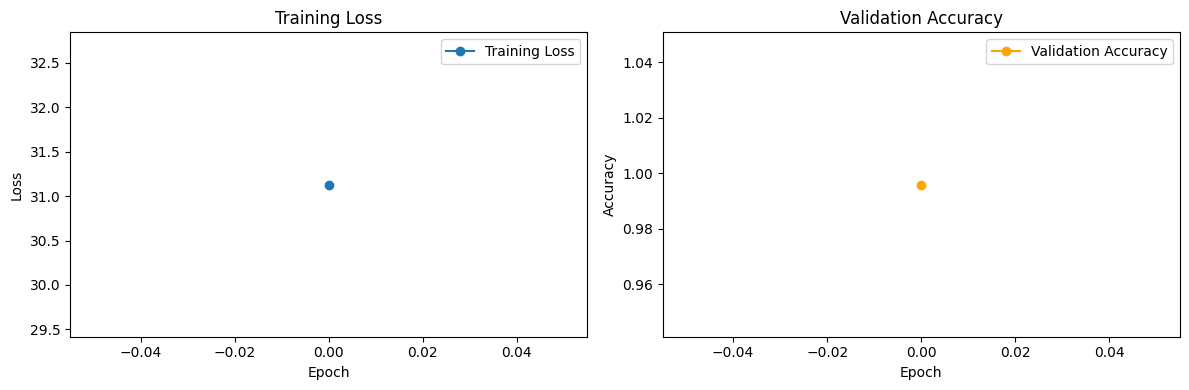

Epoch [1/4] - Training Loss: 31.1300 - Validation Loss: 0.0704 - Validation Accuracy: 0.9959


Epoch 2/4 - Validation: 100%|██████████| 31/31 [00:06<00:00,  4.65batch/s]


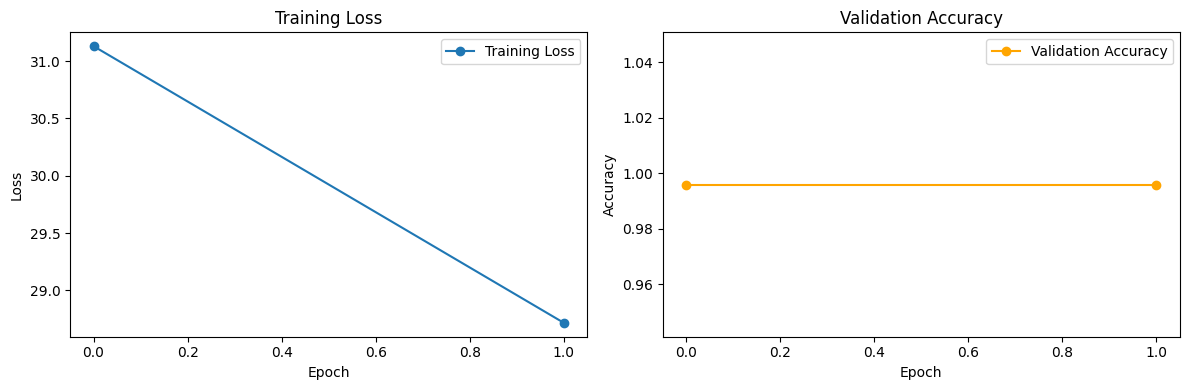

Epoch [2/4] - Training Loss: 28.7171 - Validation Loss: 0.0691 - Validation Accuracy: 0.9959


Epoch 3/4 - Validation: 100%|██████████| 31/31 [00:06<00:00,  4.61batch/s]


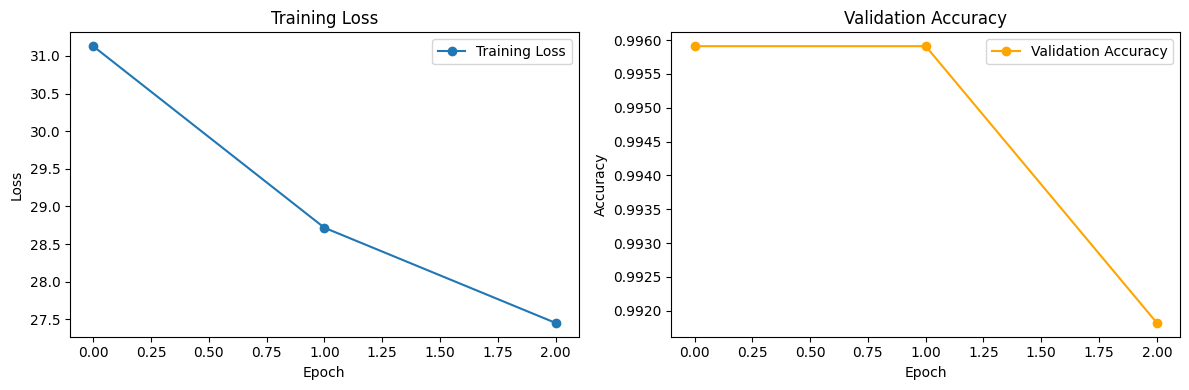

Epoch [3/4] - Training Loss: 27.4519 - Validation Loss: 0.0674 - Validation Accuracy: 0.9918


Epoch 4/4 - Validation: 100%|██████████| 31/31 [00:06<00:00,  4.59batch/s]


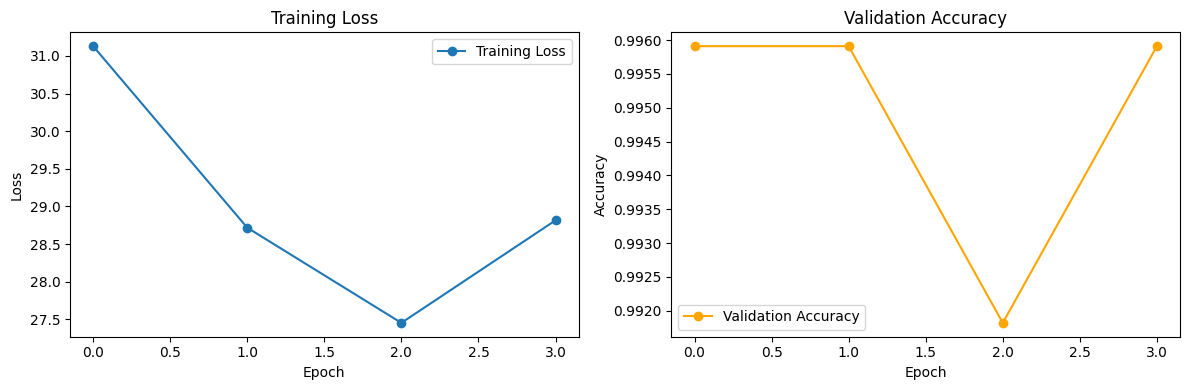

Epoch [4/4] - Training Loss: 28.8149 - Validation Loss: 0.0645 - Validation Accuracy: 0.9959


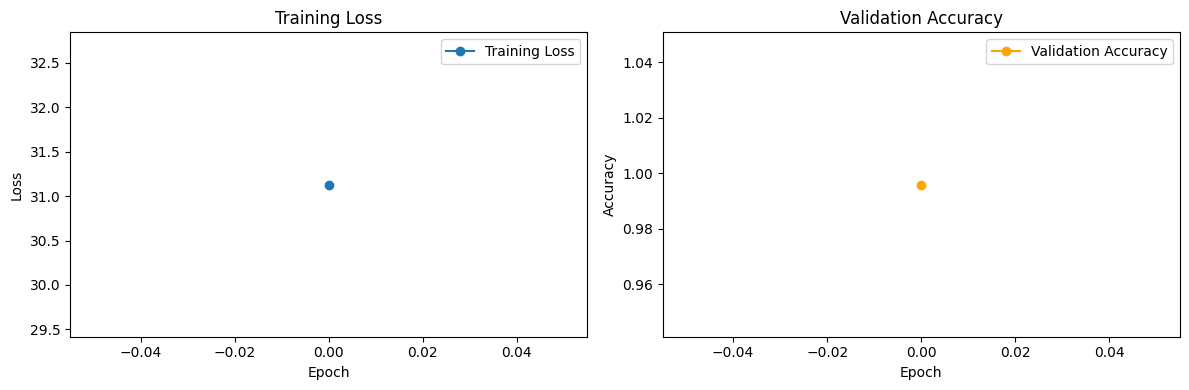

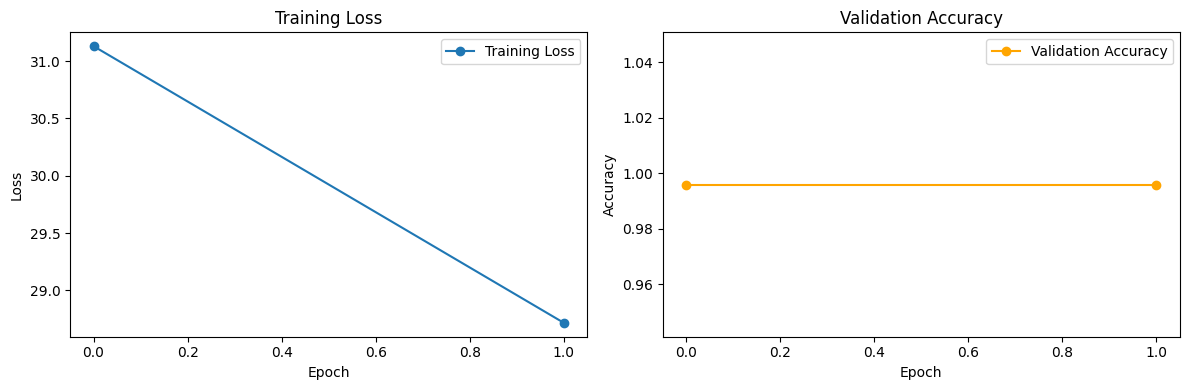

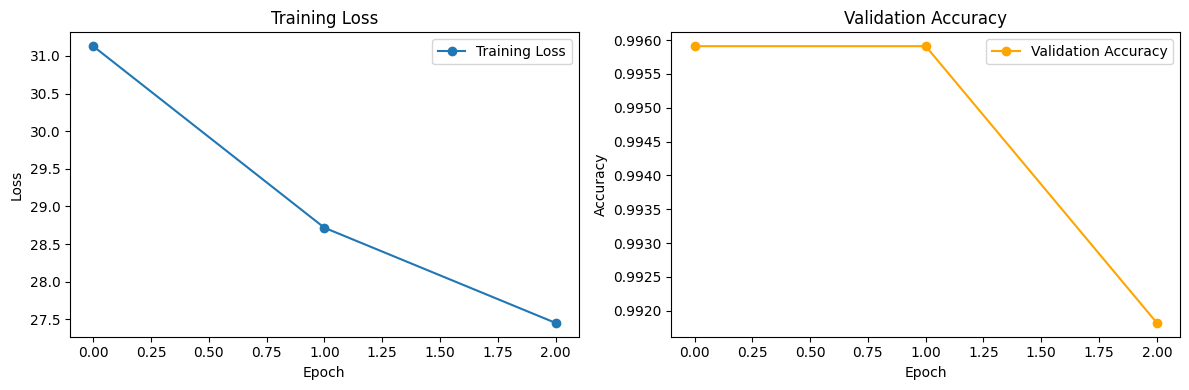

In [47]:
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from tqdm import tqdm

# Initialize lists to store training and validation metrics
train_losses = []
val_losses = []
val_accuracies = []

# Training loop with early stopping, validation accuracy, and live graph
num_epochs = 4
verbose = True  # Set to True for detailed output, False for minimal output

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0

    for batch in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs} - Training', unit='batch', disable=not verbose):
        optimizer.zero_grad()

        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['relations_id'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)

        loss = outputs.loss

        loss.backward()
        optimizer.step()

        train_loss += loss.item()

  # Validation
    model.eval()
    val_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    for batch in tqdm(val_loader, desc=f'Epoch {epoch + 1}/{num_epochs} - Validation', unit='batch', disable=not verbose):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['relations_id'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)

        val_loss += outputs.loss.item()

        # Calculate accuracy for the batch
        predictions = torch.argmax(outputs.logits, dim=1)
        correct_predictions += (predictions == labels).sum().item()
        total_predictions += len(labels)

    val_loss /= len(val_loader)
    val_accuracy = correct_predictions / total_predictions  # Validation accuracy

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    # Plot the live graph
    plt.figure(figsize=(12, 4))
    # Plot the live graph If you're using Jupyter Notebook or IPython
    #clear_output(wait=True)
    #plt.figure(figsize=(12, 4))


    # Plot training loss
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss', marker='o')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(val_accuracies, label='Validation Accuracy', marker='o', color='orange')
    plt.title('Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    display(plt.gcf())  # Display the current figure

    if verbose:
        print(f'Epoch [{epoch + 1}/{num_epochs}] - Training Loss: {train_loss:.4f} - Validation Loss: {val_loss:.4f} - Validation Accuracy: {val_accuracy:.4f}')

    # Check for early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        current_patience = 0
    else:
        current_patience += 1
    if current_patience >= patience:
        if verbose:
            print('Early stopping triggered.')
        break

# Close the last displayed figure
plt.close()


##**5. Finetuning**

Fine-tuning: In the fine-tuning step, you freeze most of the pre-trained model's layers and only allow the last few layers to be trainable. This allows you to adapt the LLM to your specific task while leveraging the pre-trained weights.

LIGHTNINGMODULE

A LightningModule organizes your PyTorch code into 6 sections. The convinience methods used are :

Initialization (init and setup()) - Define initilization here foward() - Defines how data will flow through your model from input to output. Train Loop (training_step()) - method is used to define the complete training step for your model.Components are:
Foward PassLoss CalculationBackward Pass(Gradient Calculation)Parameter Update
Validation Loop (validation_step()) - It encompasses all the necessary computations and operations that are performed during the validation process to evaluate the model's performance on a validation datase
Foward PassLoss CalculationMetric Calculation:
Test Loop (test_step())
Foward PassLoss CalculationMetric Calculation
Prediction Loop (predict_step())Optimizers and LR Schedulers (configure_optimizers())
This is used to run the foward pass of a model which happens, which is the computation that happens when data is passed from input to output.

In [48]:
!pip install lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.9/776.9 kB 26.0 MB/s eta 0:00:00


In [49]:
import lightning as L
import torch
import torchmetrics


class CustomLightningModule(L.LightningModule):
  def __init__(self, model, learning_rate=5e-5):
    super().__init__()

    self.learning_rate = learning_rate
    self.model = model

    self.val_acc = torchmetrics.Accuracy(task="multiclass", num_classes=4)
    self.test_acc = torchmetrics.Accuracy(task="multiclass", num_classes=4)

  def forward(self, input_ids, attention_mask, labels):
    return self.model(input_ids, attention_mask=attention_mask, labels=labels)

  def training_step(self, batch, batch_idx):
    outputs = self(batch["input_ids"], attention_mask=batch["attention_mask"],
                    labels=batch["relations_id"])
    self.log("train_loss", outputs["loss"])
    return outputs["loss"]  # this is passed to the optimizer for training

  def validation_step(self, batch, batch_idx):
    outputs = self(batch["input_ids"], attention_mask=batch["attention_mask"],
                    labels=batch["relations_id"])
    self.log("val_loss", outputs["loss"], prog_bar=True)

    logits = outputs["logits"]
    predicted_labels = torch.argmax(logits, 1)
    self.val_acc(predicted_labels, batch["relations_id"])
    self.log("val_acc", self.val_acc, prog_bar=True)

  def test_step(self, batch, batch_idx):
    outputs = self(batch["input_ids"], attention_mask=batch["attention_mask"],
                    labels=batch["relations_id"])

    logits = outputs["logits"]
    predicted_labels = torch.argmax(logits, 1)
    self.test_acc(predicted_labels, batch["relations_id"])
    self.log("accuracy", self.test_acc, prog_bar=True)

  def configure_optimizers(self):
    optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
    return optimizer


lightning_model = CustomLightningModule(model)

In [50]:
from lightning.pytorch.callbacks import ModelCheckpoint
from lightning.pytorch.loggers import CSVLogger

callbacks = [
    ModelCheckpoint(
        save_top_k=1, mode="max", monitor="val_acc",verbose=True
    )  # save top 1 model
]
#logger = CSVLogger(save_dir="logs/", name="my-model")
logger = CSVLogger(save_dir="/content/drive/MyDrive/logs/", name="my-model")

In [51]:
import lightning as L

trainer = L.Trainer(
  max_epochs=10,
  callbacks=callbacks,
  accelerator='cuda',
  precision="16-mixed",
  devices=[0],
  logger=logger,
  log_every_n_steps=10,

)

INFO: Using 16bit Automatic Mixed Precision (AMP)
INFO:lightning.pytorch.utilities.rank_zero:Using 16bit Automatic Mixed Precision (AMP)
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [56]:
import time
start = time.time()

trainer.fit(model=lightning_model,
            train_dataloaders=train_loader,
            val_dataloaders=val_loader
           )

end = time.time()
elapsed = end - start
print(f"Time elapsed {elapsed/60:.2f} min")

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/callbacks/model_checkpoint.py:639: Checkpoint directory /content/drive/MyDrive/logs/my-model/version_1/checkpoints exists and is not empty.
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name     | Type                          | Params
-----------------------------------------------------------
0 | model    | BertForSequenceClassification | 109 M 
1 | val_acc  | MulticlassAccuracy            | 0     
2 | test_acc | MulticlassAccuracy            | 0     
-----------------------------------------------------------
14.2 M    Trainable params
95.3 M    Non-trainable params
109 M     Total params
437.954   Total estimated model params size (MB)
INFO:lightning.pytorch.callbacks.model_summary:
  | Name     | Type                          | Params
-----------------------------------------------------------
0 | model    | BertForSequenceClassi

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=10` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


Time elapsed 0.03 min


In [ ]:
trainer.test(lightning_model, dataloaders=train_loader,ckpt_path="best")

In [ ]:
trainer.test(lightning_model, dataloaders=val_loader, ckpt_path="best")

In [ ]:
trainer.test(lightning_model, dataloaders=test_loader, ckpt_path="best")